<a href="https://colab.research.google.com/github/benmsanderson/PyDICE/blob/master/newdice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install 'dicelib @ git+https://github.com/benmsanderson/PyDICE'

  Cloning https://github.com/benmsanderson/PyDICE to /tmp/pip-install-8csekjyo/dicelib_c3902de69f3d43e9adade0dc9ef2a7fc
  Running command git clone --filter=blob:none --quiet https://github.com/benmsanderson/PyDICE /tmp/pip-install-8csekjyo/dicelib_c3902de69f3d43e9adade0dc9ef2a7fc
  Resolved https://github.com/benmsanderson/PyDICE to commit b477c06f5e5a2787bcbeff3386edd8a1c3078b96
  Preparing metadata (setup.py) ... done
  Created wheel for dicelib: filename=dicelib-1.0-py3-none-any.whl size=7856 sha256=e68e8745bf5945a8e2334caf58fa2a38525186bed798e887152c0237a8091b78
  Stored in directory: /tmp/pip-ephem-wheel-cache-d26po16v/wheels/fa/49/3e/ba361bd8b357e6ae86ec3da2a1daa3cb044974193e3548b55c
Successfully built dicelib


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import dicelib  # https://github.com/mptouzel/PyDICE

In [ ]:
dice_std = dicelib.DICE()  # create an instance of the model
dice_std.init_parameters()
dice_std.init_variables()
controls_start_std, controls_bounds_std = dice_std.get_control_bounds_and_startvalue()
dice_std.optimize_controls(controls_start_std, controls_bounds_std);

/usr/local/lib/python3.10/dist-packages/dicelib.py:263: RuntimeWarning: divide by zero encountered in double_scalars
  return self.alpha_so2*np.exp(-(self.beta_so2/iIS[index])**self.gamma_so2)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Optimization terminated successfully    (Exit mode 0)
            Current function value: -4517.318954702969
            Iterations: 95
            Function evaluations: 19232
            Gradient evaluations: 95


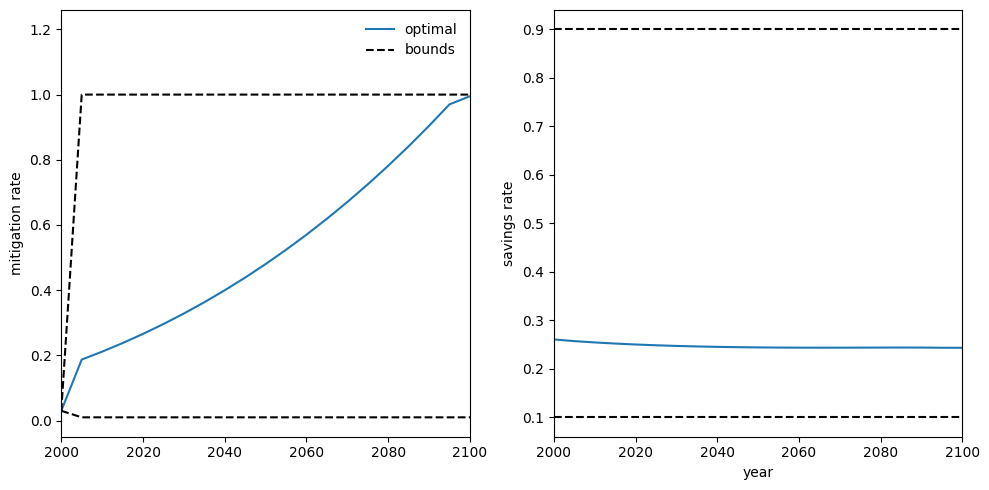

In [ ]:
fig, ax = plt.subplots(1, 2,figsize=[10,5])
max_year = 2100
TT = dice_std.TT
NT = dice_std.NT
upp, low = zip(*controls_bounds_std[:NT])
ax[0].plot(TT, dice_std.optimal_controls[:NT], label="optimal")
ax[0].plot(TT, upp, "k--", label="bounds")
ax[0].plot(TT, low, "k--")
ax[0].set_ylabel("mitigation rate")
ax[0].set_xlim(2000, max_year)
ax[0].legend(frameon=False)
upp, low = zip(*controls_bounds_std[NT:])
ax[1].plot(TT, dice_std.optimal_controls[NT:])
ax[1].plot(TT, upp, "k--")
ax[1].plot(TT, low, "k--")
ax[1].set_ylabel("savings rate")
ax[1].set_xlabel("year")
ax[1].set_xlim(2000, max_year)

fig.tight_layout()

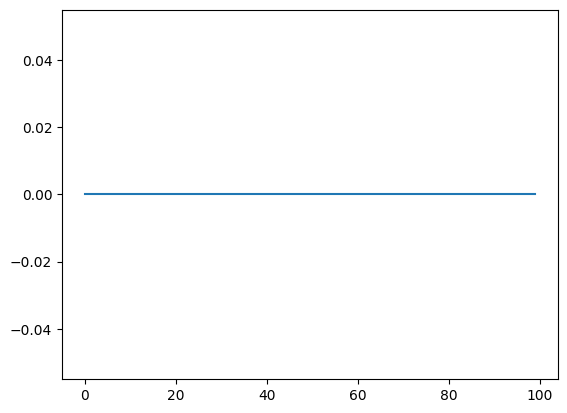

In [ ]:
plt.plot(dice_std.SRM)

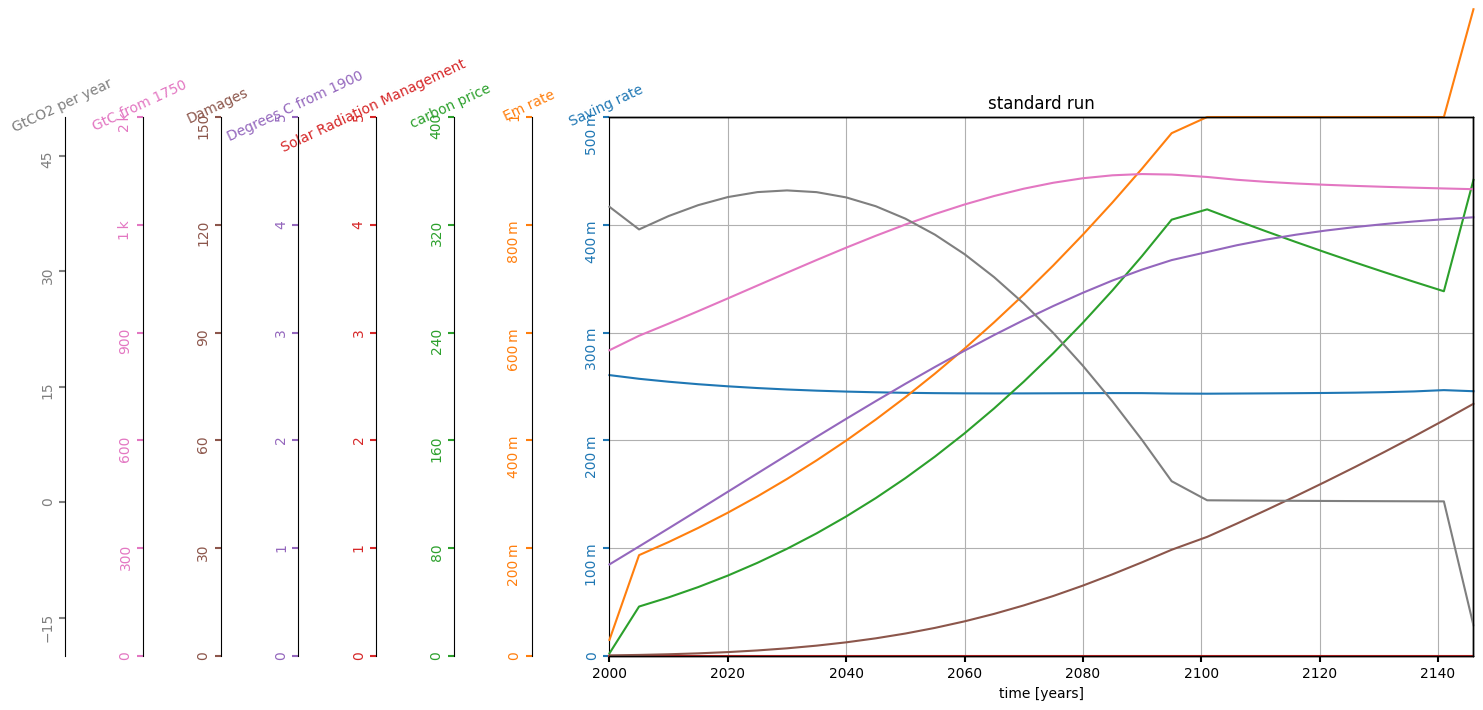

In [ ]:
dice_std.roll_out(dice_std.optimal_controls)
dice_std.plot_run("standard run")

Run with SRM

In [ ]:
dice = dicelib.DICE()
dice.init_parameters(srm_frac=10000,srm_decay=.8,srm_trg=1.5,scost=14e-9)
dice.init_variables()
controls_start, controls_bounds = dice.get_control_bounds_and_startvalue()
dice.optimize_controls(controls_start, controls_bounds)
dice.roll_out(dice.optimal_controls)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -4553.563909316876
            Iterations: 92
            Function evaluations: 18629
            Gradient evaluations: 92


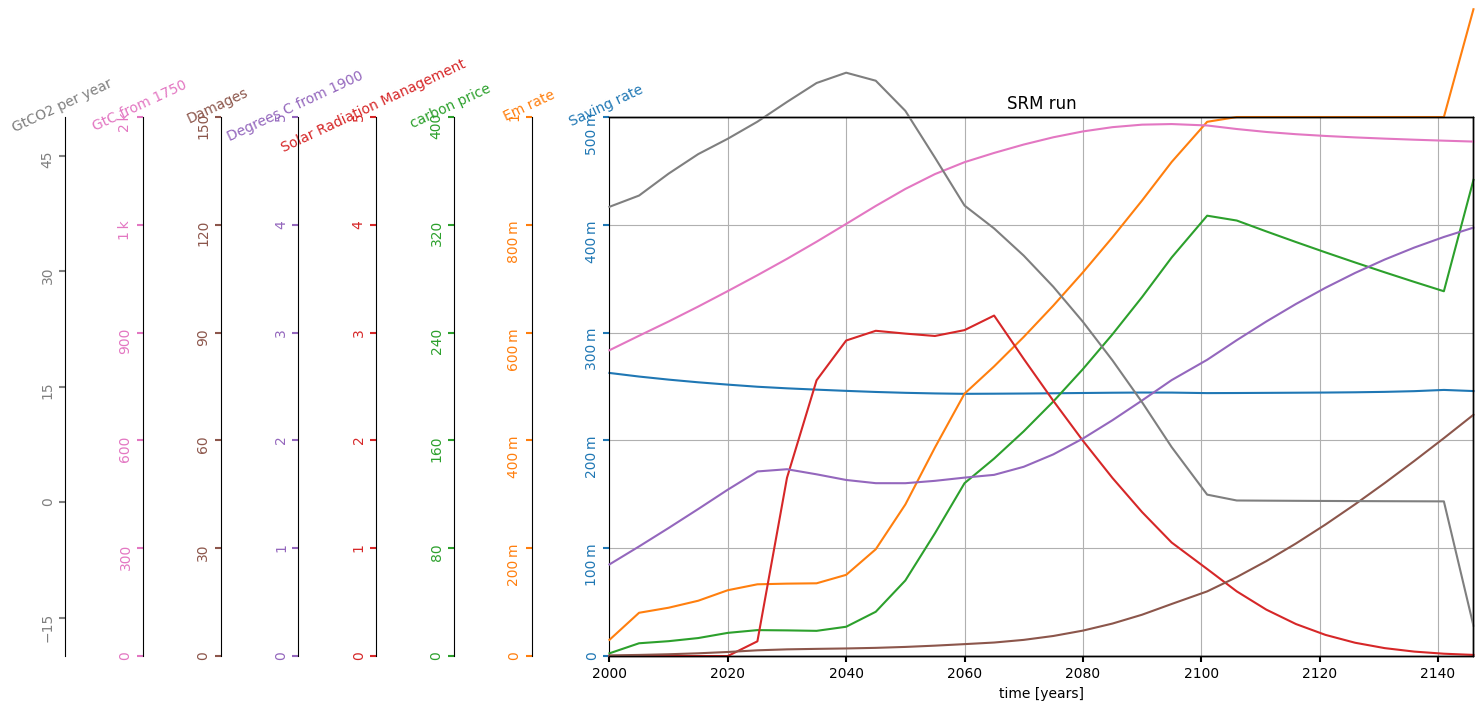

In [ ]:
dice.plot_run("SRM run")

Text(0, 0.5, 'Mt S')

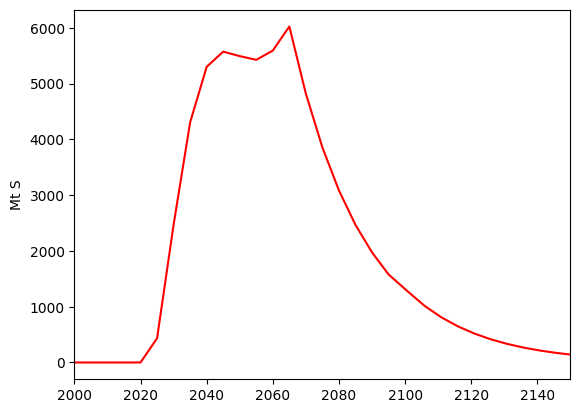

In [ ]:

plt.plot(dice_std.TT,dice.IS,'r')
plt.xlim([2000,2150])
plt.ylabel('Mt S')

In [ ]:
dice.scost

1.4e-08

(0.0, 0.002)

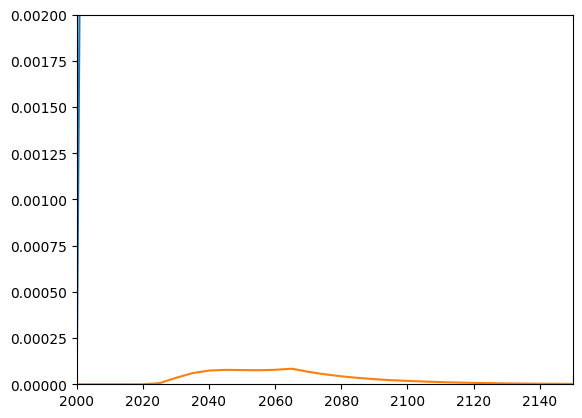

In [ ]:
plt.plot(dice.TT,dice.ABATECOST)
plt.plot(dice.TT,dice.SRMCOST)
plt.plot(dice.TT,dice.YNET)

plt.xlim([2000,2150])
plt.ylim([000,0.002])



<ipython-input-12-f01e36d492ea>:3: RuntimeWarning: divide by zero encountered in divide
  plt.plot(dice_std.TT, -10*np.exp(-(8000/dice.IS)**0.5),'k--')


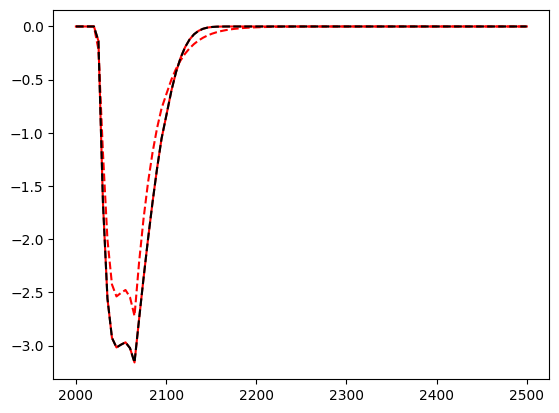

In [ ]:
plt.plot(dice_std.TT,-dice.SRM,'r')
plt.plot(dice_std.TT,-.5*dice.IS/1000+(0.2/25)*(dice.IS/1000)**2,'r--')
plt.plot(dice_std.TT, -10*np.exp(-(8000/dice.IS)**0.5),'k--')



Change the discount rate from 1.5% to 0.5%

In [ ]:
dice = dicelib.DICE()
dice.init_parameters(srm_frac=10000,srm_decay=.8,srm_trg=1.5,scost=14e-9, prstp=0.5)
dice.init_variables()
controls_start, controls_bounds = dice.get_control_bounds_and_startvalue()
dice.optimize_controls(controls_start, controls_bounds)
dice.roll_out(dice.optimal_controls)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 10322.187434875395
            Iterations: 23
            Function evaluations: 4623
            Gradient evaluations: 23


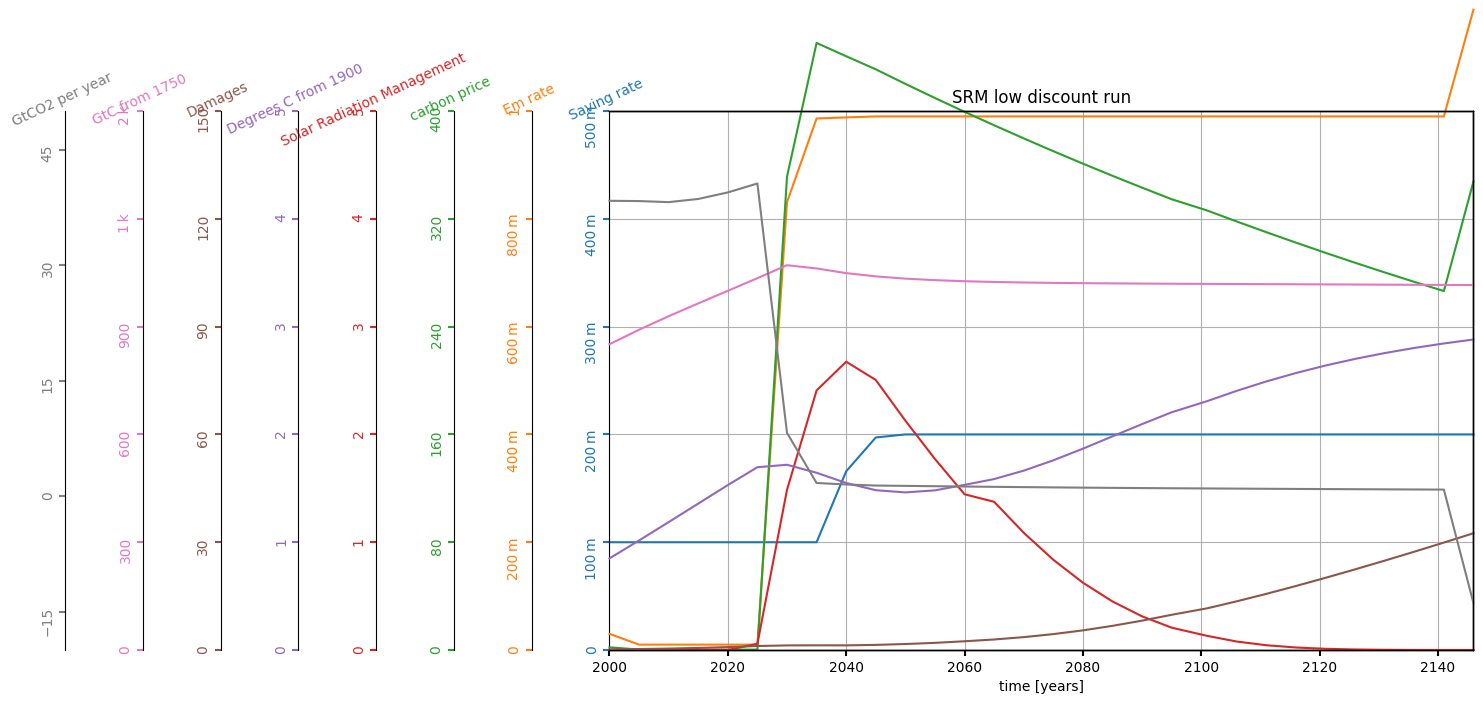

In [ ]:
dice.plot_run("SRM low discount run")